# Fake News Detection Project

In this machine learning project, I am working with fake and true news data. The aim of this project is to correctly predict a fake news by analysing the content.

### Overview:

#### 1. Project Planning 

#### 2. Data Exploration

#### 3. Cleaning the data

#### 4. Data Processing Model

#### 5. Basic Model Building 

#### 6. Final Test

# 1. Project Planning

In [146]:
# Understand the data: .info() .describe()
# Histograms and Boxplot (for categorical values)
# Value counts
# Missing data (How we remove or replace data?)
# Correlation between metrics (What parameter are related? Depended variables)
# Explore interesting themes
    # 
# Feature Engineering (Simplify data for better understanding)
# Pre-process data or use a transformer?
    # Use label for train and test
# Scaling?
# Model Baseline
# Model comparison with CV

# 2. Data Exploration

### Import Libraries

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix

### Load the data

In [80]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

### **Fake News Database**
### First view of the data

In [81]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Number of rows and columns

In [82]:
df_fake.shape

(23481, 4)

### Columns and Types

In [83]:
# No missing values

df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### **True News Database**
### First view of the data

In [84]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Number of rows and columns

In [85]:
df_true.shape

(21417, 4)

### Columns and Types

In [86]:
# No missing values

df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# 3. Cleaning the Data

## Adding a new column: giving a class to 'Fake News' and 'True News'

In [87]:
df_fake["class"] = 0
df_true["class"] = 1

In [88]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [89]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Merge the 'Fake News' and 'True News' Database

In [90]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Since we don't need the columns 'title', 'subject', and 'date', we dropped it


In [91]:
df = df_marge.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


### The next fuction clean the text from extra space, special caracters, URL, and lowercase


In [92]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

### In order to clean our Database text, we apply the previous fuction to our column 'text'


In [93]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0


### Shuffling

In [94]:
df = df.sample(frac = 1)

### Reset Index: 0, 1, 2...

In [95]:
df.reset_index(inplace = True)

### Deleting Index colum

In [96]:
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,washington reuters manufacturers and wall ...,1
1,this is war and it s a fight for the sovereign...,0
2,washington reuters u s president donald t...,1
3,mexico city reuters president donald trump...,1
4,berlin reuters german chancellor angela me...,1


In [97]:
df.shape

(44898, 2)

# 4. Data Processing Model

## Defining the variables for the model

In [98]:
x = df["text"]
y = df["class"]

## Split the data

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Text to Vectors

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
# TfidVectorizer:

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [102]:
from sklearn.metrics import plot_confusion_matrix

In [103]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

# 5. Basic Model Building 

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
# Training Logistic regretion model

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [106]:
pred_LR = LR.predict(xv_test)
print(pred_LR)

[0 0 1 ... 0 1 1]


In [107]:
LR.score(xv_test, y_test)

0.9867260579064588

In [108]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5910
           1       0.98      0.99      0.99      5315

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  0.99


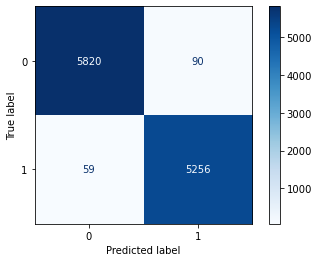

In [109]:
conf_mat_acc(LR)

The Accuracy is as follow (17508+15865)/(17508+15865+152+148)=0.99

17508: in the database the value was 0 but the prediction was 0, so it is correct!

15865: in the database the value was 1 but the prediction was 1, so it is correct! 

152: in the database the value was 0 but the prediction was 1, so it is incorrect

148: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (152 & 148) and whole the values in the diagonal*

## Decision Tree Classification

In [110]:
from sklearn.tree import DecisionTreeClassifier

### Training the Decision Tree

In [111]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [112]:
pred_DT = DT.predict(xv_test)

In [113]:
DT.score(xv_test, y_test)

0.9941202672605791

In [114]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5910
           1       0.99      1.00      0.99      5315

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  0.99


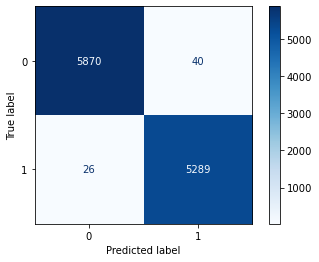

In [115]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [118]:
pred_gbc = GBC.predict(xv_test)

In [119]:
GBC.score(xv_test, y_test)

0.9940311804008909

In [120]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5910
           1       0.99      1.00      0.99      5315

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  0.99


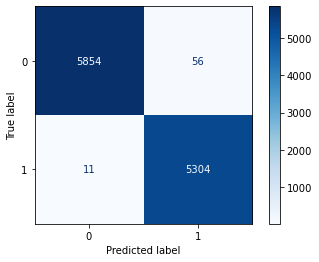

In [121]:
conf_mat_acc(GBC)

## Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [124]:
RFC.score(xv_test, y_test)

0.9906458797327394

In [125]:
pred_RFC = RFC.predict(xv_test)

In [126]:
score = accuracy_score(y_test, pred_RFC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.06%


In [127]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5910
           1       0.99      0.99      0.99      5315

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  0.99


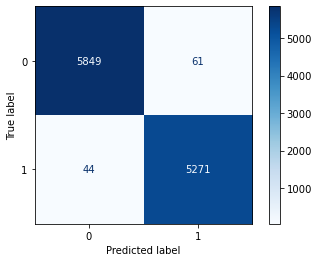

In [128]:
conf_mat_acc(RFC)

## Passive Aggressive Classifier

In [129]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [130]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [131]:
pred_PAC=PAC.predict(xv_test)
score = accuracy_score(y_test, pred_PAC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.47%


In [132]:
PAC.score(xv_test, y_test)

0.9947438752783965

accuracy:  0.99


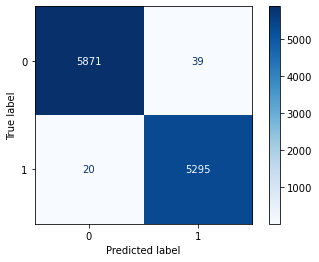

In [133]:
conf_mat_acc(PAC)

# 7. Final Test

In [134]:
news = pd.read_csv('News.csv')
news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [135]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [136]:
news['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [137]:
news['label'] = news['label'].map({'FAKE':0, 'REAL':1}).astype(int)
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [138]:
news.rename(columns={'label': 'class'}, inplace=True)
news.head()

,Unnamed: 0,title,text,class
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [139]:
news = news.drop(['Unnamed: 0', 'title'], axis=1)
news.head()

,text,class
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [140]:
news["text"] = news["text"].apply(wordopt) 
final_x_test = news["text"]
final_xv_test = vectorization.transform(final_x_test)

In [141]:
final_y_test = news['class']

## Logistic Regression TEST

In [142]:
LR.score(final_xv_test, final_y_test)

0.5951065509076559

## Decision Tree TEST

In [143]:
DT.score(final_xv_test, final_y_test)

0.5027624309392266

## Gradient Boosting Classifier TEST

In [144]:
GBC.score(final_xv_test, final_y_test)

0.5022888713496448

## Random Forest Classifier

In [145]:
RFC.score(final_xv_test, final_y_test)

0.5602209944751381